In [177]:
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

import plotly.express as px
import pandas as pd
import numpy as np

**Tahapan Pengerjaan Tugas**
1. Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel (Hint: Perhatikan data tahun kedatangan)
2. Lakukan normalisasi data (Hint: Perhatikan data bulan September dan Oktober)
3. Urutkan data berdasarkan bulan (Hint: Perhatikan penulisan nama bulan untuk mempermudah visualisasi)
4. Buatlah plot yang dapat menunjukan perubahan kenaikan maupun penurunan dari jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel (Hint: Perhatikan jenis plot yang digunakan)
5. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan hari libur di Indonesia)

In [178]:
pd.set_option('max_columns', 50)
df = pd.read_csv('cleaned_hotel_bookings_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,75.0,0,0,Check-Out
1,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304,0,0,Personal,75.0,0,0,Check-Out
2,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,98.0,0,1,Check-Out
3,Resort Hotel,0,0,2017,September,27,1,0,2,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,107.0,0,0,Check-Out
4,Resort Hotel,0,9,2017,September,27,1,0,2,2,0,0,Full Board,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,303,0,0,Personal,103.0,0,1,Check-Out


In [179]:
def monthly_booking(df):
    df = df.copy()
    
    # grouping the number of booking per each hotel and month
    dfg = df.groupby(['hotel', 'arrival_date_month']).agg({
        "arrival_date_year": "nunique",
        "reservation_status": "count"
    })
    dfg = dfg.reset_index()
    dfg.columns = ['hotel_type', 'month', 'no_unique_year', 'booking_count']
    
    # normalize the data by calculating average booking per each month
    dfg['avg_booking_count'] = dfg['booking_count'] / dfg['no_unique_year']
    dfg['avg_booking_count'] = dfg['avg_booking_count'].astype(int)
    
    # map the month into integer for sorting
    month_to_int = { 
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12, 
    }
    dfg['month_int'] = dfg['month'].map(month_to_int)
    dfg['month'] = dfg['month'].apply(lambda x: str(x)[:3])
    
    # sort the dataframe by hotel type and month 
    dfg = dfg.sort_values(by=['hotel_type', 'month_int'])
    
    
    return dfg[['hotel_type', 'month', 'avg_booking_count']]
    
monthly_booking(df)

,hotel_type,month,avg_booking_count
4,City Hotel,Jan,1424
3,City Hotel,Feb,1476
7,City Hotel,Mar,1337
0,City Hotel,Apr,1757
8,City Hotel,May,2388
6,City Hotel,Jun,2508
5,City Hotel,Jul,2660
1,City Hotel,Aug,2454
11,City Hotel,Sep,1885
10,City Hotel,Oct,2157


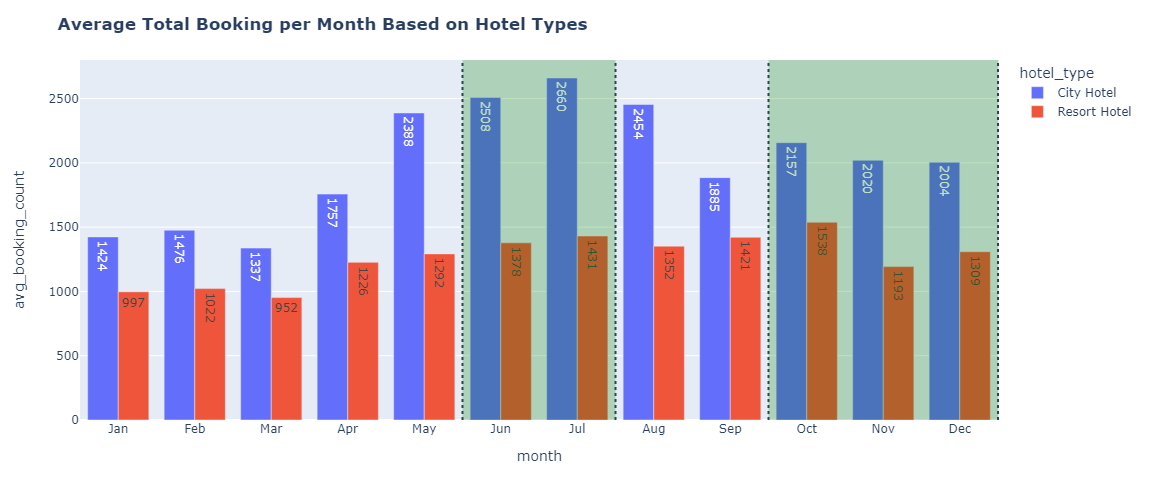

In [185]:
dfg = monthly_booking(df)
fig = px.bar(dfg, x='month',
             y='avg_booking_count',
             color='hotel_type',
             barmode='group',
             text='avg_booking_count',
             height=500
            )

fig.add_vline(x=4.5, line_dash="dot")
fig.add_vline(x=6.5, line_dash="dot")
fig.add_vrect(x0='4.5', x1='6.5', col=1,
              fillcolor='green', opacity=0.25, line_width=0)

fig.add_vline(x=8.5, line_dash="dot")
fig.add_vline(x=11.5, line_dash="dot")
fig.add_vrect(x0='8.5', x1='11.5', col=1,
              fillcolor='green', opacity=0.25, line_width=0)


fig.update_layout(
    title_text='<b>Average Total Booking per Month Based on Hotel Types<br>',
)